In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s
my_data = pd.read_csv("C:\Users\wangz_i6ij2py\Downloads\Python_project_eda.csv")
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [2]:
spent_list = my_data[['spend_usd_next_14_days']][my_data.spend_usd_next_14_days >= 0.001]
spent_list = spent_list['spend_usd_next_14_days'].tolist()
len(spent_list)

89032

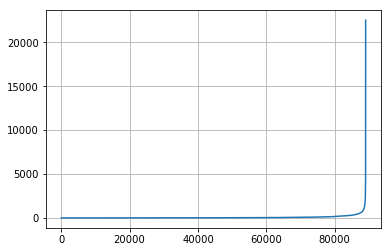

In [3]:
spent_list.sort()
#del spent_list[-1000:]
fig, ax = plt.subplots()
ax.plot(spent_list)
ax.grid(True, which='both')

In [6]:
my_data['spend_usd_next_14_days'] = winsorize_series(my_data['spend_usd_next_14_days'])
clean_data = my_data.fillna(0)
clean_data.describe()

C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wangz_i6ij2py\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,7.824848,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,35.158918,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.342025,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [7]:
saw_buyer_in_pot = clean_data[(clean_data.saw_cart_before == 1) & (clean_data.user_added_fop == 1)]
saw_buyer_in_pot.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,156961.000000,156961.000000,156961.000000,156961.000000,156961.0,156961.000000,156961.000000,156961.000000,156961.0,156961.000000,156961.000000,1.569610e+05,156961.0
mean,2.232211,0.795726,0.872911,0.660279,1.0,27.622178,0.550742,0.484999,1.0,0.192959,0.099713,9.209513e+18,1.0
std,2.615744,0.403171,0.333074,0.473616,0.0,62.184248,0.497420,0.499777,0.0,0.394622,0.299617,5.317502e+18,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,9.099261e+12,1.0
25%,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,4.591854e+18,1.0
50%,1.000000,1.000000,1.000000,1.000000,1.0,1.026880,1.000000,0.000000,1.0,0.000000,0.000000,9.200279e+18,1.0
75%,4.000000,1.000000,1.000000,1.000000,1.0,19.960000,1.000000,1.000000,1.0,0.000000,0.000000,1.380110e+19,1.0
max,8.000000,1.000000,1.000000,1.000000,1.0,289.342025,1.000000,1.000000,1.0,1.000000,1.000000,1.844674e+19,1.0


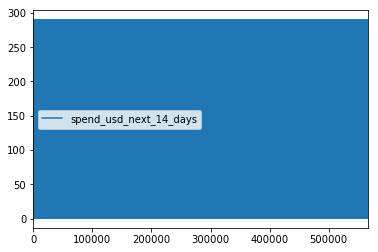

In [12]:
spent = clean_data[['spend_usd_next_14_days']][clean_data.spend_usd_next_14_days>0.001]
spent.plot()

In [13]:
spent.describe()

,spend_usd_next_14_days
count,89032.000000
mean,49.806067
std,76.008991
min,1.026880
25%,4.990000
50%,15.828656
75%,54.795602
max,289.342025


In [17]:
s_list = spent['spend_usd_next_14_days'].tolist()
s_list.sort()

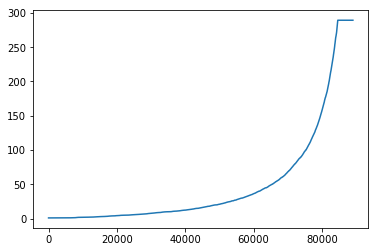

In [18]:
plt.plot(s_list)